In [118]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from state import SushiCardType, card_to_index, score_dumplings, PUDDING_SCORE, NIGIRI_VALS, MAKI_SCORE
from dp import NUM_UNIQUE_CARDS

In [119]:
folder_name = "0062"
path = f"collected_data/{folder_name}"
# path = f"../sushi_go_newt/collected_data/{folder_name}"
PUDDING_SCORE = 6
MAKI_SCORE = [6, 3]
SASHIMI_SCORE = 10
TEMPURA_SCORE = 5


## Turn numbers

In [120]:

enum_to_name = {
    0: 'TEMPURA',
    1: 'SASHIMI',
    2: 'DUMPLING',
    3: 'MAKI_ROLLS_1',
    4: 'MAKI_ROLLS_2',
    5: 'MAKI_ROLLS_3',
    6: 'SALMON_NIGIRI',
    7: 'SQUID_NIGIRI',
    8: 'EGG_NIGIRI',
    9: 'PUDDING',
    10: 'WASABI',
    11: 'CHOPSTICKS',
    # 12: 'HIDDEN',
}

In [121]:
with open(f"{path}/turn_numbers{folder_name}.pkl", "rb") as f:
    turn_numbers = pickle.load(f) 
    for card in turn_numbers:
        print(card)

if turn_numbers[-1][0] == "HIDDEN":
    turn_numbers.pop()
data = [card[1] for card in turn_numbers]
index = [card[0] for card in turn_numbers]
columns = [str(i + 1) for i in range(len(data[0]))]
df = pd.DataFrame(data, index=index, columns=columns)
total_counts = [sum(row) for row in data]
prop_data = [np.asarray(turn_numbers[i][1]) / total_counts[i] for i in range(len(turn_numbers))]
prop_df = pd.DataFrame(prop_data, index=index, columns=columns)
display(df)
with pd.option_context('display.precision', 4):
    display(prop_df)
# uncomment to write prop_df to a csv file
# prop_df.to_csv(f"{path}/turn_props{folder_name}.csv")

['TEMPURA', [82, 96, 87, 55, 62, 84]]
['SASHIMI', [33, 52, 47, 55, 117, 174]]
['DUMPLING', [34, 56, 96, 119, 109, 43]]
['MAKI_ROLLS_1', [16, 18, 29, 61, 49, 35]]
['MAKI_ROLLS_2', [72, 78, 81, 80, 70, 30]]
['MAKI_ROLLS_3', [115, 62, 52, 30, 14, 2]]
['SALMON_NIGIRI', [35, 75, 88, 84, 43, 12]]
['SQUID_NIGIRI', [93, 57, 24, 6, 0, 0]]
['EGG_NIGIRI', [4, 11, 21, 50, 50, 27]]
['PUDDING', [61, 61, 63, 51, 44, 21]]
['WASABI', [32, 23, 14, 10, 36, 75]]
['CHOPSTICKS', [23, 20, 19, 23, 23, 97]]
['HIDDEN', []]


,1,2,3,4,5,6
TEMPURA,82,96,87,55,62,84
SASHIMI,33,52,47,55,117,174
DUMPLING,34,56,96,119,109,43
MAKI_ROLLS_1,16,18,29,61,49,35
MAKI_ROLLS_2,72,78,81,80,70,30
MAKI_ROLLS_3,115,62,52,30,14,2
SALMON_NIGIRI,35,75,88,84,43,12
SQUID_NIGIRI,93,57,24,6,0,0
EGG_NIGIRI,4,11,21,50,50,27
PUDDING,61,61,63,51,44,21


,1,2,3,4,5,6
TEMPURA,0.1760,0.2060,0.1867,0.1180,0.1330,0.1803
SASHIMI,0.0690,0.1088,0.0983,0.1151,0.2448,0.3640
DUMPLING,0.0744,0.1225,0.2101,0.2604,0.2385,0.0941
MAKI_ROLLS_1,0.0769,0.0865,0.1394,0.2933,0.2356,0.1683
MAKI_ROLLS_2,0.1752,0.1898,0.1971,0.1946,0.1703,0.0730
MAKI_ROLLS_3,0.4182,0.2255,0.1891,0.1091,0.0509,0.0073
SALMON_NIGIRI,0.1039,0.2226,0.2611,0.2493,0.1276,0.0356
SQUID_NIGIRI,0.5167,0.3167,0.1333,0.0333,0.0000,0.0000
EGG_NIGIRI,0.0245,0.0675,0.1288,0.3067,0.3067,0.1656
PUDDING,0.2027,0.2027,0.2093,0.1694,0.1462,0.0698


## Scores

P0 winrate: 0.7
P1 winrate: 0.23
Tie rate: 0.07
Combined P0 winrate: 73.500\%
Combined P1 winrate: 26.500\%


,dp_0,mcts1000_1,diff,p0_win
count,100.000000,100.000000,100.000000,100.000000
mean,29.530000,27.080000,2.450000,0.470000
std,4.436886,3.700068,3.707418,0.846323
min,22.000000,19.000000,-6.000000,-1.000000
25%,26.000000,25.000000,0.000000,0.000000
50%,29.000000,26.000000,2.000000,1.000000
75%,32.000000,30.000000,5.000000,1.000000
max,42.000000,38.000000,13.000000,1.000000


(array([ 2.,  9., 12., 14., 26., 19.,  8.,  8.,  0.,  2.]),
 array([-6. , -4.1, -2.2, -0.3,  1.6,  3.5,  5.4,  7.3,  9.2, 11.1, 13. ]),
 <BarContainer object of 10 artists>)

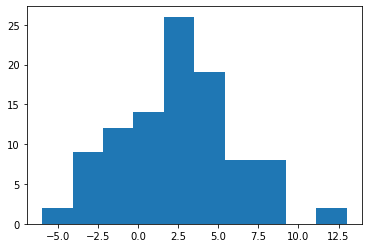

In [122]:
def diff_to_win(row):
    if row["diff"] > 0:
        return 1
    if row["diff"] < 0:
        return -1
    return 0

with open(f"{path}/scores_list{folder_name}.pkl", "rb") as f:
    scores = pickle.load(f)
with open(f"{path}/player_names{folder_name}.pkl", "rb") as f:
    names = pickle.load(f)
scores_df = pd.DataFrame(data=scores, columns=names)
scores_df["diff"] = scores_df[names[0]] - scores_df[names[1]]
scores_df["p0_win"] = scores_df.apply(diff_to_win, axis=1)
p0_prop = scores_df[scores_df["p0_win"] == 1.0].shape[0] / scores_df.shape[0]
p1_prop = scores_df[scores_df["p0_win"] == -1.0].shape[0] / scores_df.shape[0]
tie_prop = scores_df[scores_df["p0_win"] == 0.0].shape[0] / scores_df.shape[0]
# print(f"P0 wins: {p0_prop:.2f}")
# print(f"P1 wins: {p1_prop:.2f}")
# print(f"Ties: {tie_prop:.2f}")
print(f"P0 winrate: {p0_prop}")
print(f"P1 winrate: {p1_prop}")
print(f"Tie rate: {tie_prop}")
p0_winrate = 100 * (p0_prop + (0.5 * tie_prop))
p1_winrate = 100 * (p1_prop + (0.5 * tie_prop))
print(f"Combined P0 winrate: {p0_winrate:.3f}\%")
print(f"Combined P1 winrate: {p1_winrate:.3f}\%")
display(scores_df.describe())
plt.hist(scores_df["diff"])
# folder_name = "0033"
# path = f"collected_data/{folder_name}"
# scores_df = pd.read_csv(f"{path}/scores_df{folder_name}.csv", index_col=0)
# plt.hist(scores_df["diff"])

## LP data

In [123]:
# DP agent
mixed_strats = []
with open(f"{path}/mixed_strats{folder_name}", "r") as f:
    for line in f.readlines():
        mixed_strats.append(ast.literal_eval(line.strip()))
mixed_strats_by_turn = dict()
for game_mixed_strats in mixed_strats:
    for mixed_strat, turn_num in game_mixed_strats:
        if turn_num in mixed_strats_by_turn:
            mixed_strats_by_turn[turn_num].append(mixed_strat)
        else:
            mixed_strats_by_turn[turn_num] = [mixed_strat]
for i in range(10):
    if i in mixed_strats_by_turn:
        print(len(mixed_strats_by_turn[i]) / scores_df.shape[0], end="\t")
    else:
        print(0, end="\t")

0.34	0.39	0.19	0.06	0.03	0	0	0	0	0	

In [124]:
# LP agent


# with open(f"{path}/lp_pure{folder_name}.pkl", "rb") as f:
#     lp_pure = pickle.load(f)
# for i in range(len(lp_pure)):
#     pure = sorted([(num, lp_pure[i][num]) for num in lp_pure[i]])
#     print(f"Turn {i + 1}: {pure}")
    

## Points scored by card

### Average score per round

In [125]:
def score_hash_state_each(hash_state, combine_nigiri=False):
    """
    Returns [[pudding_score, maki_score, tempura_score, sashimi_score, dumplings_score, nigiri_score] for player in players].
    Assumes 2 players.
    """

    played = [[hash_state[i + (NUM_UNIQUE_CARDS * (2 + player_num))] for i in range(NUM_UNIQUE_CARDS)] for player_num in range(2)]
    scores = [[] for i in range(2)]
    # score pudding
    pudding_diff = played[0][card_to_index[SushiCardType.PUDDING]] - played[1][card_to_index[SushiCardType.PUDDING]]
    scores[0].append(0)
    scores[1].append(0)
    if pudding_diff > 0:
        scores[0][-1] += PUDDING_SCORE
    elif pudding_diff < 0:
        scores[1][-1] += PUDDING_SCORE
    
    # score maki
    maki_0 = 3 * played[0][card_to_index[SushiCardType.MAKI_ROLLS_3]] + 2 * played[0][card_to_index[SushiCardType.MAKI_ROLLS_2]] + played[0][card_to_index[SushiCardType.MAKI_ROLLS_1]]
    maki_1 = 3 * played[1][card_to_index[SushiCardType.MAKI_ROLLS_3]] + 2 * played[1][card_to_index[SushiCardType.MAKI_ROLLS_2]] + played[1][card_to_index[SushiCardType.MAKI_ROLLS_1]]
    if maki_0 > maki_1:
        scores[0].append(MAKI_SCORE[0])
        if maki_1 > 0:
            scores[1].append(MAKI_SCORE[1])
        else:
            scores[1].append(0)
    elif maki_1 > maki_0:
        scores[1].append(MAKI_SCORE[0])
        if maki_0 > 0:
            scores[0].append(MAKI_SCORE[1])
        else:
            scores[0].append(0)
    elif maki_0 > 0:
        scores[0].append(MAKI_SCORE[1])
        scores[1].append(MAKI_SCORE[1])
    else:
        scores[0].append(0)
        scores[1].append(0)

    # score everything else
    for player_num in range(2):
        # score tempura
        scores[player_num].append(TEMPURA_SCORE * (played[player_num][card_to_index[SushiCardType.TEMPURA]] // 2))
        # score sashimi
        scores[player_num].append(SASHIMI_SCORE * (played[player_num][card_to_index[SushiCardType.SASHIMI]] // 3))
        # score dumplings
        scores[player_num].append(score_dumplings(played[player_num][card_to_index[SushiCardType.DUMPLING]]))
        # score nigiri
        if combine_nigiri:
            nigiri_score = 0
            for card in NIGIRI_VALS:
                nigiri_score += NIGIRI_VALS[card] * played[player_num][card_to_index[card]]
            scores[player_num].append(nigiri_score)
        else:
            for card in NIGIRI_VALS:
                scores[player_num].append(NIGIRI_VALS[card] * played[player_num][card_to_index[card]])
    return scores


In [126]:
states = []
with open(f"{path}/game_states{folder_name}", "r") as f:
    for line in f:
        states.append(ast.literal_eval(line.strip()))

In [127]:
score_strs = ["score_pudding", "score_maki", "score_tempura", "score_sashimi", "score_dumplings", "score_egg_nigiri", "score_salmon_nigiri", "score_squid_nigiri", "score_egg_wasabi", "score_salmon_wasabi", "score_squid_wasabi"]
column_names = []
for player in ["p0", "p1"]:
    for score_str in score_strs:
        column_names.append(f"{player}_{score_str}")
card_scores = []
# assumes 1 round
for game in states:
    final_state = game[-1][-1]
    scores0, scores1 = score_hash_state_each(final_state)
    card_scores.append(scores0 + scores1)
card_scores_df = pd.DataFrame(data=card_scores, columns=column_names)
card_scores_df.head()

,p0_score_pudding,p0_score_maki,p0_score_tempura,p0_score_sashimi,p0_score_dumplings,p0_score_egg_nigiri,p0_score_salmon_nigiri,p0_score_squid_nigiri,p0_score_egg_wasabi,p0_score_salmon_wasabi,...,p1_score_maki,p1_score_tempura,p1_score_sashimi,p1_score_dumplings,p1_score_egg_nigiri,p1_score_salmon_nigiri,p1_score_squid_nigiri,p1_score_egg_wasabi,p1_score_salmon_wasabi,p1_score_squid_wasabi
0,6,0,0,0,0,1,2,0,0,0,...,6,0,0,0,0,0,0,0,0,0
1,6,3,0,0,0,0,4,0,0,0,...,6,0,0,1,0,0,0,0,0,0
2,6,3,5,0,0,0,0,0,0,6,...,6,0,0,0,0,4,3,0,0,0
3,6,6,0,0,1,0,0,0,0,0,...,3,0,0,1,0,0,3,0,0,0
4,6,6,0,0,1,0,2,0,0,0,...,3,5,0,1,1,0,0,0,0,0


In [128]:
card_scores_df.mean()

p0_score_pudding          3.66
p0_score_maki             3.57
p0_score_tempura          0.75
p0_score_sashimi          0.20
p0_score_dumplings        0.80
p0_score_egg_nigiri       0.15
p0_score_salmon_nigiri    0.96
p0_score_squid_nigiri     0.60
p0_score_egg_wasabi       0.06
p0_score_salmon_wasabi    0.78
p0_score_squid_wasabi     0.63
p1_score_pudding          1.02
p1_score_maki             4.41
p1_score_tempura          1.10
p1_score_sashimi          0.10
p1_score_dumplings        0.94
p1_score_egg_nigiri       0.19
p1_score_salmon_nigiri    0.94
p1_score_squid_nigiri     0.99
p1_score_egg_wasabi       0.00
p1_score_salmon_wasabi    0.06
p1_score_squid_wasabi     0.00
dtype: float64

### Average score per card played

In [129]:
def count_cards(hash_state):
    """
    Returns [[pudding_count, maki_count, tempura_count, sashimi_count, dumplings_count, nigiri_count] for player in players].
    Assumes 2 players.
    """
    played = [[hash_state[i + (NUM_UNIQUE_CARDS * (2 + player_num))] for i in range(NUM_UNIQUE_CARDS)] for player_num in range(2)]
    counts = [[] for i in range(2)]
    for player_num in range(2):
        counts[player_num].append(played[player_num][card_to_index[SushiCardType.PUDDING]])
        counts[player_num].append(played[player_num][card_to_index[SushiCardType.MAKI_ROLLS_1]] + played[player_num][card_to_index[SushiCardType.MAKI_ROLLS_2]] + played[player_num][card_to_index[SushiCardType.MAKI_ROLLS_3]])
        counts[player_num].append(played[player_num][card_to_index[SushiCardType.TEMPURA]])
        counts[player_num].append(played[player_num][card_to_index[SushiCardType.SASHIMI]])
        counts[player_num].append(played[player_num][card_to_index[SushiCardType.DUMPLING]])
        num_nigiri = 0
        for card_type in [SushiCardType.WASABI, SushiCardType.EGG_NIGIRI, SushiCardType.SALMON_NIGIRI, SushiCardType.SQUID_NIGIRI]:
            num_nigiri += played[player_num][card_to_index[card_type]]
        for card_type in [SushiCardType.EGG_WASABI, SushiCardType.SALMON_WASABI, SushiCardType.SQUID_WASABI]:
            num_nigiri += 2 * played[player_num][card_to_index[card_type]]
        counts[player_num].append(num_nigiri)
    return counts

In [130]:
states = []
with open(f"{path}/game_states{folder_name}", "r") as f:
    for line in f:
        states.append(ast.literal_eval(line.strip()))
        
score_strs = ["score_pudding", "score_maki", "score_tempura", "score_sashimi", "score_dumplings", "score_nigiri"]
column_names = []
for player in ["p0", "p1"]:
    for score_str in score_strs:
        column_names.append(f"{player}_{score_str}")
card_scores = []
card_counts = []
# assumes 1 round
for game in states:
    final_state = game[-1][-1]
    scores0, scores1 = score_hash_state_each(final_state, combine_nigiri=True)
    counts0, counts1 = count_cards(final_state)
    card_scores.append(scores0 + scores1)
    card_counts.append(counts0 + counts1)

card_scores_df = pd.DataFrame(data=card_scores, columns=column_names)
card_counts_df = pd.DataFrame(data=card_counts, columns=column_names)
print(card_scores_df.sum() / card_counts_df.sum())


p0_score_pudding      2.103448
p0_score_maki         2.380000
p0_score_tempura      1.041667
p0_score_sashimi      0.217391
p0_score_dumplings    1.176471
p0_score_nigiri       2.148649
p1_score_pudding      0.803150
p1_score_maki         2.689024
p1_score_tempura      1.279070
p1_score_sashimi      0.125000
p1_score_dumplings    1.342857
p1_score_nigiri       1.591241
dtype: float64


## Data for poster and report

In [131]:
scores_by_card = card_scores_df.sum() / card_counts_df.sum()
print("Average score:", (scores_df["dp_0"].mean() + scores_df["dp_1"].mean()) / 2)
to_paste = [(scores_df["dp_0"].mean() + scores_df["dp_1"].mean()) / 2]
for score_str in score_strs:
    to_paste.append((scores_by_card["p0_" + score_str] + scores_by_card["p1_" + score_str]) / 2)
print("\t".join([f"{p:.4f}" for p in to_paste]))

KeyError: 'dp_1'

In [453]:
for i in range(prop_df.shape[0]):
    print(prop_df["1"].iloc[i], end="\t")

0.14814814814814814	0.1111111111111111	0.0	0.0	0.0	0.06666666666666667	0.0	0.25	0.0	0.17647058823529413	0.5	0.15384615384615385	